<a href="https://colab.research.google.com/github/uday9250-ai-ml/AI-ML/blob/main/aiml_lab_exam__2303A54017_data_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/fetal_health.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("Dataset Head:")
print(data.head())

Dataset Head:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                   

In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_ter

In [ ]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_

In [ ]:
print("\nBasic Statistical Summary:")
print(data.describe())


Basic Statistical Summary:
       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960         

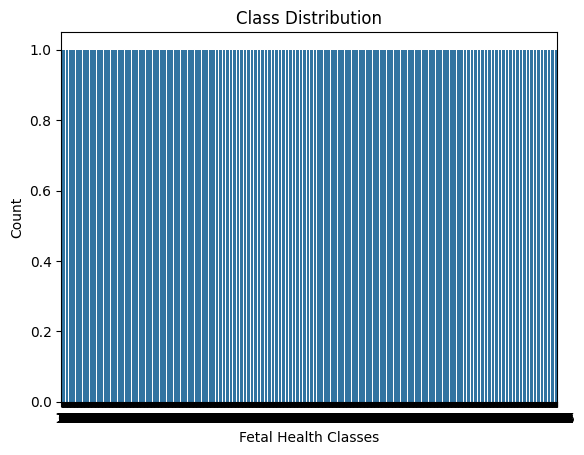

In [ ]:
sns.countplot(data['fetal_health'])
plt.title('Class Distribution')
plt.xlabel('Fetal Health Classes')
plt.ylabel('Count')
plt.show()

In [ ]:
filtered_data = data[50:]
sns.pairplot(filtered_data, kind="hist")
plt.show()

NameError: name 'data' is not defined

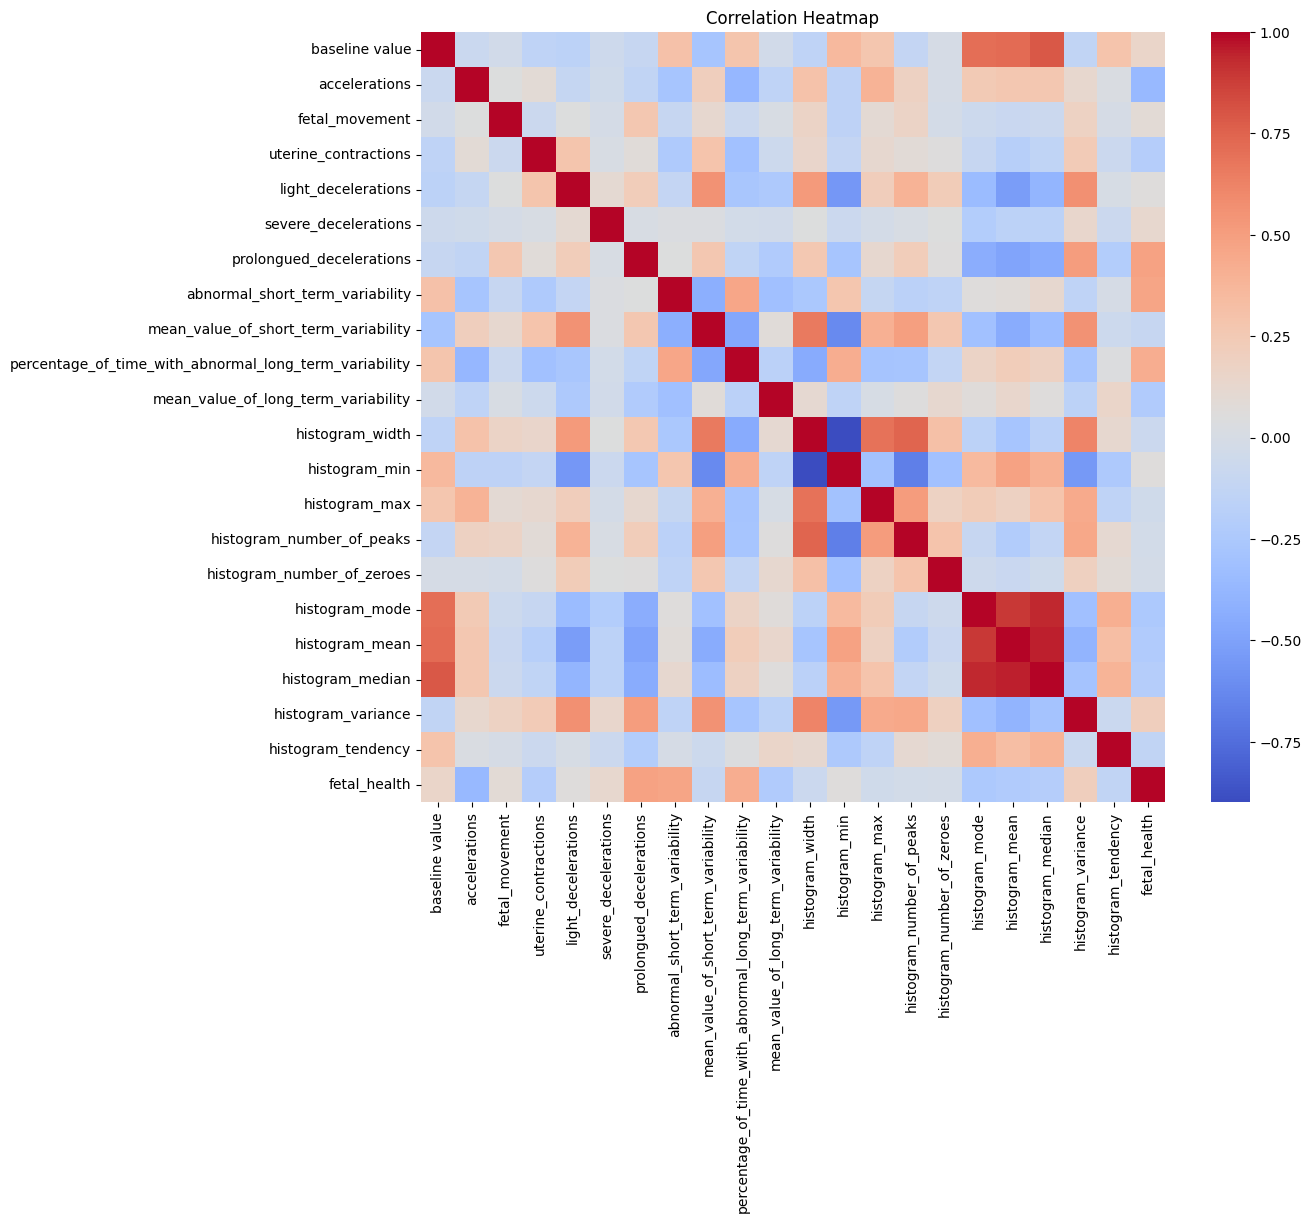

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print("\nCovariance Matrix:")
print(data.cov())


Covariance Matrix:
                                                    baseline value  \
baseline value                                           96.842216   
accelerations                                            -0.003065   
fetal_movement                                           -0.015355   
uterine_contractions                                     -0.004244   
light_decelerations                                      -0.004633   
severe_decelerations                                     -0.000030   
prolongued_decelerations                                 -0.000607   
abnormal_short_term_variability                          51.699944   
mean_value_of_short_term_variability                     -2.430296   
percentage_of_time_with_abnormal_long_term_vari...       51.710615   
mean_value_of_long_term_variability                      -1.777416   
histogram_width                                         -56.613674   
histogram_min                                           105.194187   


In [ ]:
X = data.drop(columns=['fetal_health'])
y = data['fetal_health']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
linear_svc = SVC(kernel='linear', random_state=42)
linear_svc.fit(X_train_scaled, y_train)
y_pred_linear = linear_svc.predict(X_test_scaled)

In [ ]:
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_svc.predict(X_test_scaled)

In [ ]:
print("\nLinear Kernel - Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))


Linear Kernel - Model Performance:
Accuracy: 0.8981191222570533
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       496
         2.0       0.70      0.69      0.70       101
         3.0       0.73      0.85      0.79        41

    accuracy                           0.90       638
   macro avg       0.79      0.83      0.81       638
weighted avg       0.90      0.90      0.90       638



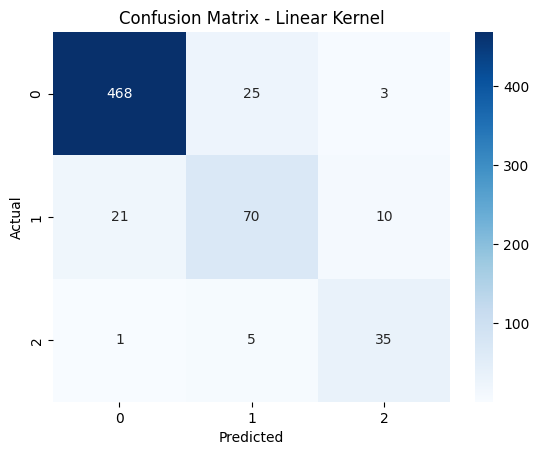

In [ ]:
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()